# Generating Graphs

This file contains notes on a number of funtions that ccan be used to generate random graphs, including both random and regular graphs


In [5]:
import networkx as nx
import numpy as np

# Regular

### Compleate Graphs 

Compleate graphs are graphs where every node is connected to every other node. 

The below function creates a compleated graph, by initialising an undirected graph and then drawing edges between all pairs of nodes. The sub function `all_pairs` takes a list of nodes and enumerates all distinct pairs.

For grater description of gnereator functions see https://wiki.python.org/moin/Generators


In [6]:
# take a list of nodes and enumerates all distinct pairs

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

# Create a graph that creates an edge between every pair of nodes

def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

#### Compleate Graph Example

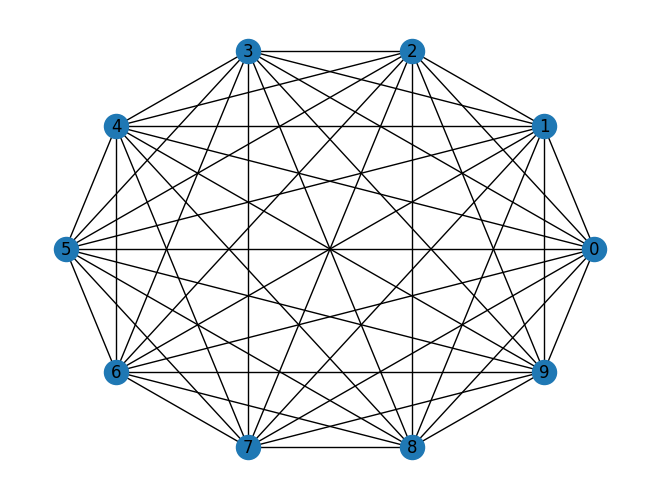

In [7]:
# Generate a complete graph 
G = make_complete_graph(10)

# draw_circular will plot the network as a circle 
nx.draw_circular(G, with_labels=True)

## Erdős-Rényi model Random Graph

A random graph is a graph that has been generated with a series of nodes that are connected at random. While there are many methods to do this one of the most common is a Erdős-Rényi model doveloped in the 1960's

Erdos and Reney random graphs are characterised by two parameters $G(n,p)$: where $n$ is the number of nodes and $p$ is the proberbility of an edge between each node for graph $G$.

These can be generated in Python using the inbuilt functions within the `networkx` library, however we can also define a number of functions that create this random network from scratch.

In [8]:
## Create a random Graph from scratch 


# random_pairs uses flip:
def flip(p):
    return np.random.random() < p

# all_pairs to map all potential edges 
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

# Generating random pairs 
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

# Make_random_graph generates and returns the ER graph G(n, p):
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G 

#### Erdős-Rényi Graph Example

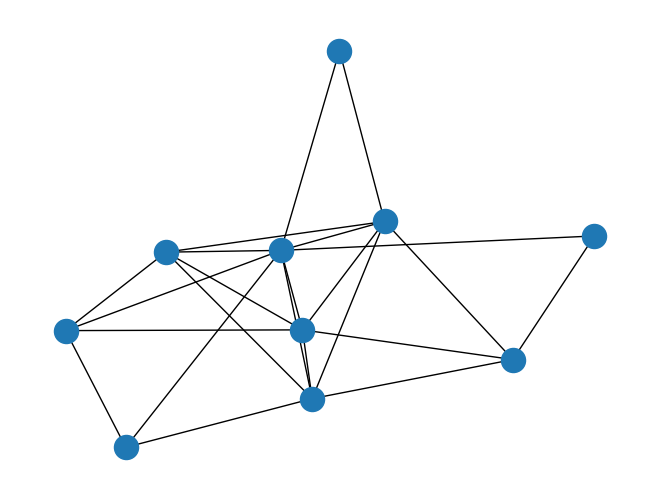

In [9]:
graph = make_random_graph(10, 0.5)
nx.draw(graph)

While these function are helpful for understanding how the graph is being created. Rather than building the function itself we can use the in built functions within the `Networkx` library.

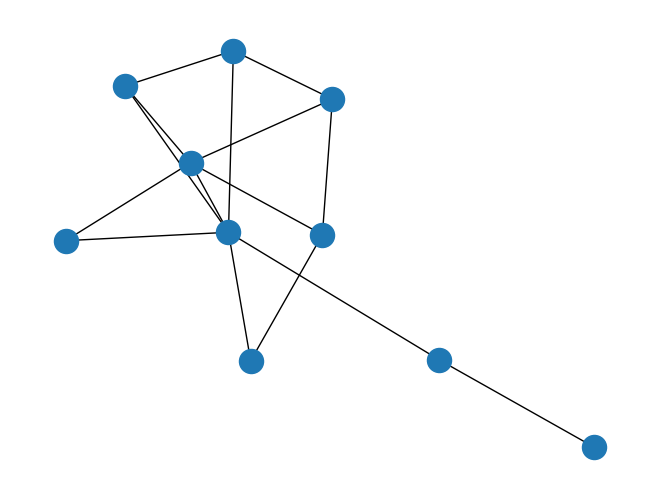

In [10]:
## Using the NetworkX libraries built in functions 
graph = nx.erdos_renyi_graph(10, 0.4)
nx.draw(graph)

## Erdős-Rényi model Critical Value 

One of their surprising features of this form of random graph is the abrupt changes in the properties of random graphs as random edges are added. In partucular whether graphs are connected or not - that is wheather there is a path between all nodes in the network. 

An interesing propert of Erdős-Rényi graphs is up until a certain point the probabilitty that a graph is *connected* is very low when $p$ is small, while when $p$ is larger than this point the likleyhood a graph is cpnnected is high. This value is known as the critical value can be defined as:
$$ p^* = \frac{ln(n)}{n} $$ 

Where $n$ is the number of nodes in the network. We can test this out ourselves by checking whaether a path exists from every node to every other node.

We can test whaether a graoh is connected using the below functions. First the function `reachable_nodes` counts the number of nodes that are reachable by the start node. 

If the graph is connected then all nodes will be reachable by any node and the number of reachable nodes will be equal to $n$. The second function tests wheather this condition is true. 

In [11]:
# Finding the reachable nodes
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

# Test wheather the node can reach all others 
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

In [12]:
# Testing Graphs 
is_connected(G)

True

## Watts ans Strogatz Graphs


Watts and Strogatz indtroduce a model to help us understand small world networks, that is

Their model starts with two types of graphs that are well understood: random and regular graphs. 

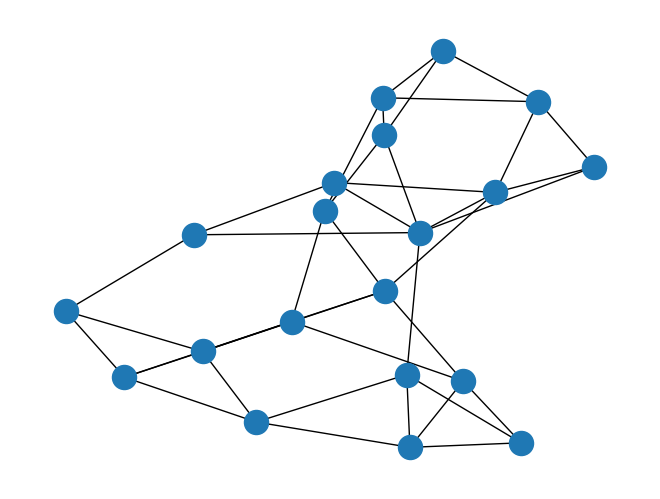

In [ ]:
graph = nx.connected_watts_strogatz_graph(20, 4, 0.3, 5)

nx.draw(graph)